# **Week Zero Report**

1. **Introduction**
   
    1. **Simple Random Walk:** Imagine taking a step up (+1) or down (−1) with 50/50 probability at discrete  time intervals (e.g., every second). This is a **discrete** **random walk**.
    2. **Scaling the Walk:** Now, make the time steps (dt) and the step sizes (dx) much, much smaller. Instead of one big step every second, you take millions of tiny steps every microsecond.
    3. **Brownian Motion (Wiener Process):** As you take the limit where the time step dt to 0, this scaled random walk becomes a continuous-time process. This limit is **Brownian Motion**. It's the continuous, non-differentiable "random wiggle" that forms the core of GBM.
    4. **Geometric Brownian Motion (GBM):** A simple random walk or Brownian motion can go negative. Stock prices can't. **GBM is just an exponentiated Brownian Motion**. By exponentiating, you ensure the value is always positive. Instead of modeling the price S directly, you model the *log-return* **log(Sₜ / Sₜ₋₁)** as following a regular Brownian Motion (with a drift term
    5. **Uncertainty Matters:** Uncertainty matters in financial markets because prices are influenced by many unpredictable factors—news, economic changes, and investor behavior. Since we cannot know exactly how these forces will affect prices, investors focus on the range of possible outcomes rather than a single prediction. Higher uncertainty means more risk, because future prices can move more widely. Understanding this uncertainty helps investors make better decisions and price assets more realistically.

# 2. **Day 1 Python for Quants:**
   
   On Day 1, I learned the basics of working with financial time-series data. I practiced loading market datasets, cleaning missing values, and understanding how price data is structured. I also learned how to calculate daily returns and why returns are more meaningful than raw prices in quantitative finance. These foundations prepared me for deeper topics in the following days.

**Loading the Dataset**

df = pd.read_csv('AAPL.csv')

*Display the first few rows and info to understand the data structure*

display(df.head())
df.info()


**Processisng the Dataset**

*Convert 'Date' column to datetime objects*

df['Date'] = pd.to_datetime(df['Date'])

*Set the 'Date' column as the DataFrame's index*

df.set_index('Date', inplace=True)

*Calculate daily returns using the percentage change of the 'Close' price*

df['Daily Returns'] = df['Close'].pct_change()

*Calculate the 20-day Simple Moving Average (SMA) of the 'Close' price*

df['20-Day SMA'] = df['Close'].rolling(window=20).mean()

*Display the first few rows of the DataFrame with the new columns*

display(df.head())

**Visualizing The Data**

*Create a figure and axes for the plot*

plt.figure(figsize=(14, 7))

*Plot the 'Close' price*

plt.plot(df['Close'], label='Closing Price', color='blue')

*Plot the '20-Day SMA'*

plt.plot(df['20-Day SMA'], label='20-Day SMA', color='red', linestyle='--')

*Add a title and labels for clarity*

plt.title('AAPL Closing Price and 20-Day Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

*Add a legend to distinguish between the plotted lines*

plt.legend()

*Add a grid for better readability*

plt.grid(True)

*Display the plot*

plt.show()

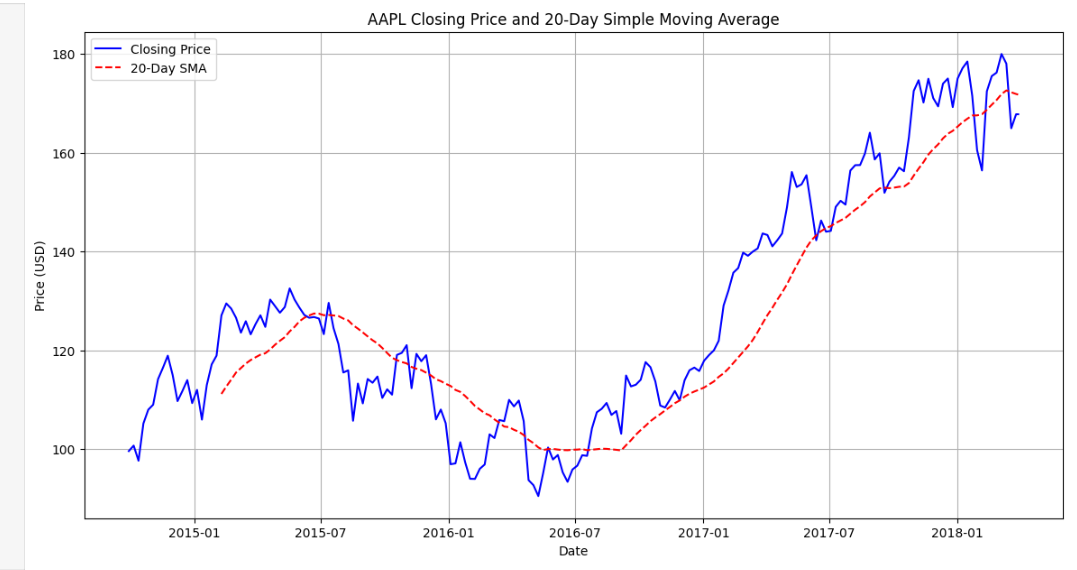

# 3. **Day 2 – Data Handling & Visualization:**
   
   On Day 2, I learned how to clean and prepare financial data by handling NaNs and resampling prices into daily and weekly frequencies. I also explored rolling windows to compute moving averages and rolling volatility, which help capture trends and changing market behavior. Additionally, I worked with correlation matrices to understand relationships between different assets. Using Matplotlib and Seaborn, I created various charts to visualize prices, volatility, and correlations, gaining a clearer picture of how financial data behaves over time.

*Handling the NaNs*

df = df.dropna()
*Calculating the returns using the closing prices*

df['returns'] = df['close'].pct_change()
*Showing the histogram of daily returns*

plt.figure(figsize=(10,5))
sns.histplot(df['returns'], bins=50, kde=True)
plt.title("Histogram of Daily Returns")
plt.show()
*Calculating Daily Rolling Volume*

df['rolling_vol'] = df['returns'].rolling(window=21).std()
*Showing the 21-Day rolling Volume with volatility clustering*

plt.figure(figsize=(14,6))
plt.text(
    df.index[int(len(df)*0.001)],               
    df['rolling_vol'].max()*0.75,              
    text,
    fontsize=10,
    bbox=dict(facecolor='white')     
)
df['rolling_vol'].plot()
plt.title("21-Day Rolling Volatility")
plt.ylabel("Volatility")
plt.show()

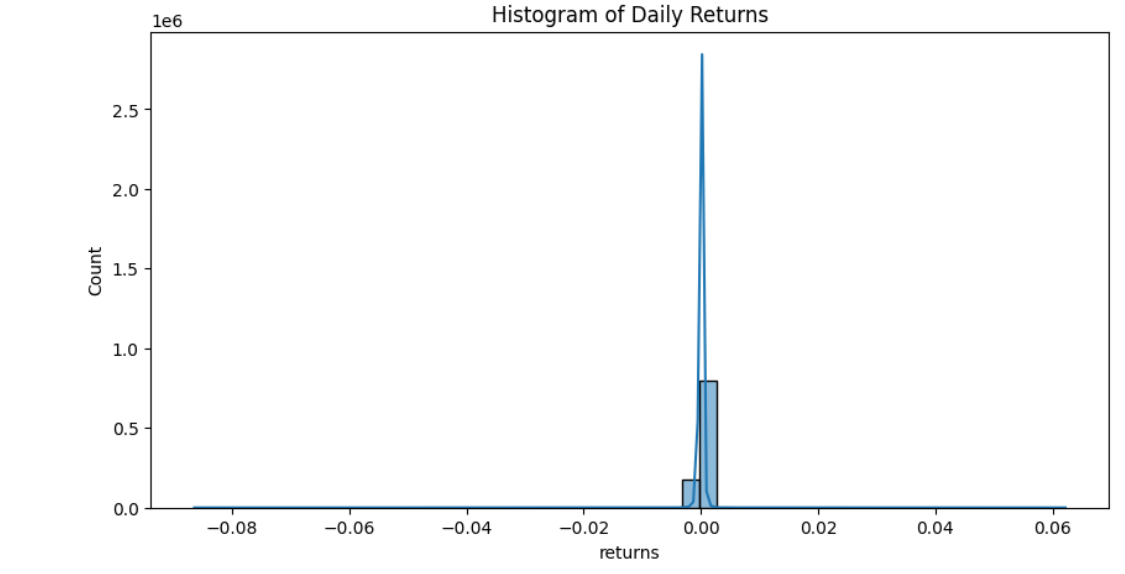

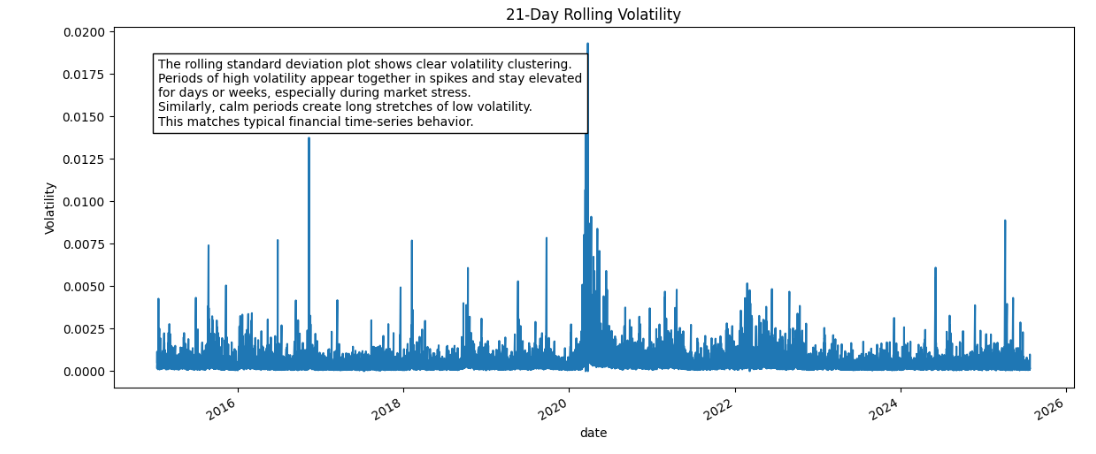

# 4. **Day 3 – Math Foundations for Quants**
   
   On Day 3, I learned key statistical concepts used in quantitative finance. I explored expectation, variance, and covariance, and understood how covariance matrices describe relationships between multiple assets. I also learned how z-scores help standardize data and identify unusual values. Finally, I studied the normal (Gaussian) distribution and why it is commonly used to model returns and risk in financial markets.
   

# 5. **Discrete Random Walks -> continuos GBM**

   On Day 4, I learned how simple discrete random walks can be used to model basic price movements, where prices change step-by-step with random increments. This idea extends naturally to continuous time and leads to the Geometric Brownian Motion (GBM) model, which is used to simulate realistic stock prices. GBM incorporates drift and volatility, producing smooth, continuous price paths that follow a lognormal distribution. This transition from discrete randomness to continuous GBM helped me understand how modern quantitative models describe uncertainty in financial markets.

   Generated 10 price paths , plotted there projectories , and histograms of final prices used matplotlib.pyplot
   for plotting the paths and histogram and numpy for generating paths  

*Function for genrating paths , here num_paths =10, N= 252(Trading Days), S_0(the price on day 1)=100,used time of 1 year,sigma= 0.2, mu = 0.1*

all_paths = np.zeros((N, num_paths))

for j in range(num_paths):
    prices = np.zeros(N)
    prices[0] = S_0
    for t in range(1, N):
        Z = np.random.randn()
        prices[t] = prices[t-1] * np.exp((mu - 0.5*sigma**2)*dt 
                                         + sigma*np.sqrt(dt)*Z)
    all_paths[:, j] = prices
*10 Simulated GBM price paths*

plt.figure(figsize=(12,5))
plt.plot(all_paths)
plt.title("10 Simulated GBM Price Paths")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.show()

*Histogram of final prices*

final_prices = all_paths[-1, :]   # last row = final prices of all paths

plt.figure(figsize=(8,5))
plt.hist(final_prices, bins=30, edgecolor='black')
plt.title("Histogram of Final Prices")
plt.xlabel("Final Price")
plt.ylabel("Frequency")
plt.show()

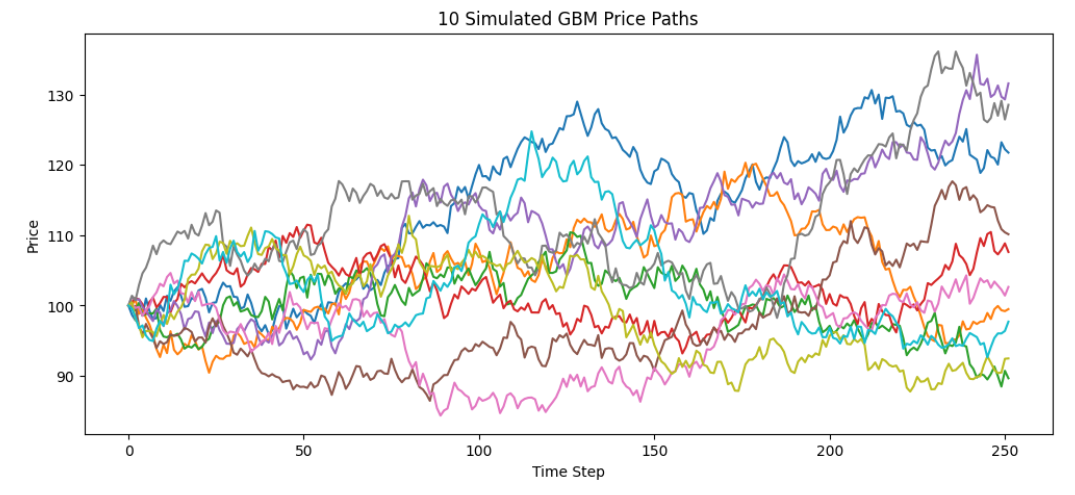

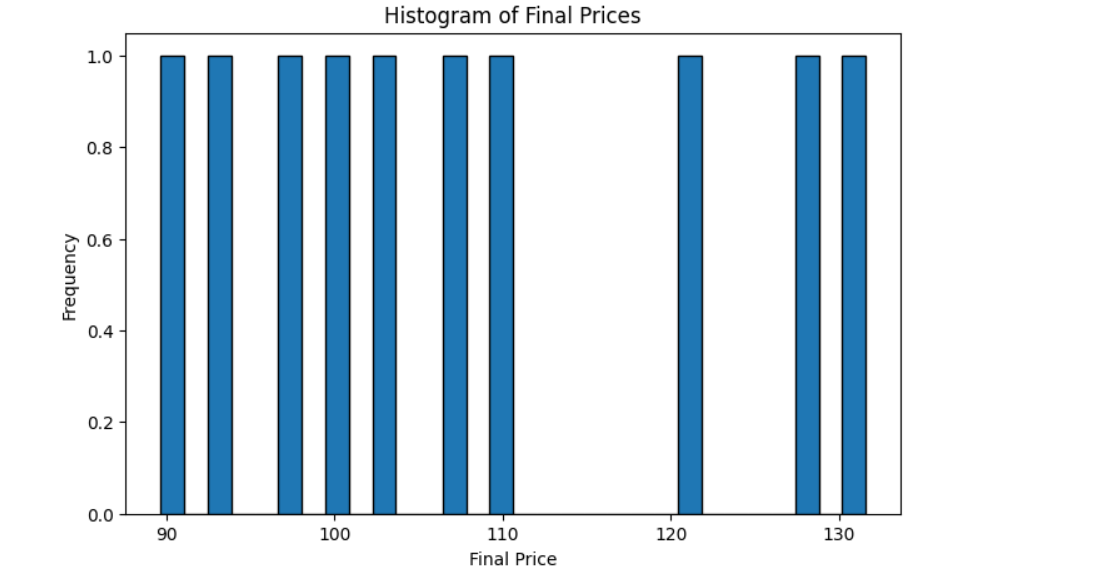

# 6. **Discussion** 

  The simulations highlight how randomness creates a wide range of possible price paths, even when the underlying parameters remain constant.

  Daily returns exhibit volatility clustering, reminding us that markets often move in bursts rather than smoothly.

  Comparing discrete random walks with continuous GBM shows how mathematical models attempt to capture real-world uncertainty, but still simplify many market dynamics.

  Correlation and covariance analysis reveal that assets rarely move independently, which increases or reduces overall portfolio risk depending on their relationships.

  Overall, the results show that uncertainty is unavoidable in markets, and modelling it is essential for understanding potential risks and outcomes.